<a href="https://colab.research.google.com/github/rbltsnii/Praktikum_AI_Workflow/blob/main/praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# Buat data penjualan toko
data = {
    "Tanggal": ["2025-03-01", "2025-03-02", "2025-03-03", "2025-03-04", "2025-03-05", "2025-03-06", "2025-03-07", "2025-03-08", "2025-03-09", "2025-03-10"],
    "Produk": ["Cireng Isi", "Gehu", "Lepet", "Cakue", "Es Teh",
               "Kopi", "Indomie", "Rokok", "Bala-bala", "Saus Sambal"],
    "Jumlah Terjual": [8, 5, 12, 10, 6, 15, 9, 11, 7, 13],
    "Stok": [30, 25, 20, 15, 18, 35, 28, 22, 19, 26],
    "Harga Satuan": [2000,2000, 5000, 5000, 4000, 5000, 15000, 25000, 1000, 3000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan.csv", index=False)

In [3]:
#membaca file CSV
df =pd.read_csv("data_penjualan_latihan.csv")

#menampilkan 5 data pertama
print(df.head())

      Tanggal      Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-03-01  Cireng Isi               8    30          2000
1  2025-03-02        Gehu               5    25          2000
2  2025-03-03       Lepet              12    20          5000
3  2025-03-04       Cakue              10    15          5000
4  2025-03-05      Es Teh               6    18          4000


In [4]:
#cek apa ada data yang kosong
print(df.isnull().sum())

#konvers kolom tanggal ke format datetime
df["Tanggal"]=pd.to_datetime(df["Tanggal"])
df["Total Penjualan"]=df["Jumlah Terjual"] *df["Harga Satuan"]
df["Keuntungan"]=df["Total Penjualan"] - (df["Jumlah Terjual"]*10000)

print(df.head())

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal      Produk  Jumlah Terjual  Stok  Harga Satuan  Total Penjualan  \
0 2025-03-01  Cireng Isi               8    30          2000            16000   
1 2025-03-02        Gehu               5    25          2000            10000   
2 2025-03-03       Lepet              12    20          5000            60000   
3 2025-03-04       Cakue              10    15          5000            50000   
4 2025-03-05      Es Teh               6    18          4000            24000   

   Keuntungan  
0      -64000  
1      -40000  
2      -60000  
3      -50000  
4      -36000  


In [5]:
!pip install scikit-learn

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (x) dan target (y)
x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model =DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluasi model
y_pred =model.predict(x_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


In [7]:
produk_baru=[[8,3]]
prediksi=model.predict(produk_baru)

if prediksi[0]==1:
  print("produk perlu di restock")
else:
  print("stock cukup")

stock cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


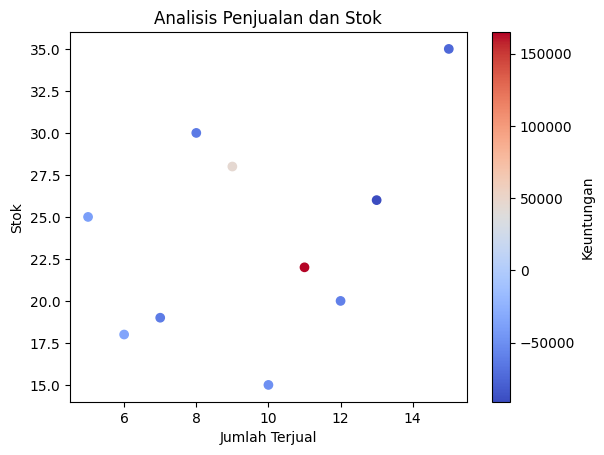

In [8]:
import matplotlib.pyplot as plt
plt.scatter (df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()
